In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df1 = pd.DataFrame(iris.data,columns = iris.feature_names)
df2 = pd.DataFrame(iris.target,columns = ["Species"])
df = pd.concat([df1,df2],axis=1)

In [3]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
round(df.corr(),3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000,-0.118,0.872,0.818,0.783
sepal width (cm),-0.118,1.000,-0.428,-0.366,-0.427
petal length (cm),0.872,-0.428,1.000,0.963,0.949
petal width (cm),0.818,-0.366,0.963,1.000,0.957
Species,0.783,-0.427,0.949,0.957,1.000


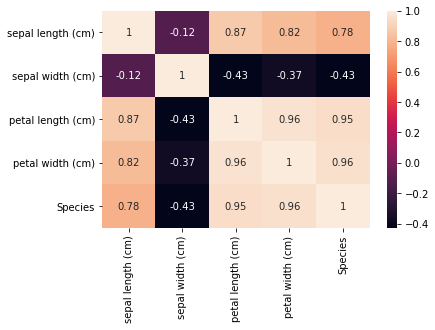

In [6]:
sns.heatmap(round(df.corr(),3),annot=True)

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


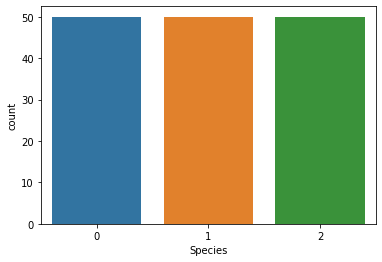

In [8]:
sns.countplot(df["Species"])

In [9]:
clf = RandomForestClassifier(n_jobs=2)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(df1,df2,test_size=0.3,random_state=4)

In [11]:
clf.fit(X_train,y_train)

<ipython-input-11-86937c1966f0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(n_jobs=2)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [14]:
df["Species_name"] = pd.Categorical.from_codes(iris.target,iris.target_names)

In [15]:
confusion_matrix(y_test,y_pred,)

array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]])

In [16]:
test_pred = iris.target_names[clf.predict([[6.5,4.2,2.5,1.2]])]
test_pred

array(['versicolor'], dtype='<U10')

In [17]:
print("Training Score:",clf.score(X_train,y_train))
print("Testing Score:",clf.score(X_test,y_test))

Training Score: 1.0
Testing Score: 0.9777777777777777
